In [1]:
import numpy as np
import cv2
import glob
import itertools

def getImageArr( path , width , height , imgNorm="sub_mean" , odering='' ):

	try:
		img = cv2.imread(path, 1)

		if imgNorm == "sub_and_divide":
			img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
		elif imgNorm == "sub_mean":
			img = cv2.resize(img, ( width , height ))
			img = img.astype(np.float32)
			img[:,:,0] -= 103.939
			img[:,:,1] -= 116.779
			img[:,:,2] -= 123.68
		elif imgNorm == "divide":
			img = cv2.resize(img, ( width , height ))
			img = img.astype(np.float32)
			img = img/255.0

		if odering == 'channels_first':
			img = np.rollaxis(img, 2, 0)
		return img
	except Exception, e:
		print path , e
		img = np.zeros((  height , width  , 3 ))
		if odering == 'channels_first':
			img = np.rollaxis(img, 2, 0)
		return img





def getSegmentationArr( path , nClasses ,  width , height  ):

	seg_labels = np.zeros((  height , width  , nClasses ))
	try:
		img = cv2.imread(path, 1)
		img = cv2.resize(img, ( width , height ))
		img = img[:, : , 0]

		for c in range(nClasses):
			seg_labels[: , : , c ] = (img == c ).astype(int)

	except Exception, e:
		print e
		
	seg_labels = np.reshape(seg_labels, ( width*height , nClasses ))
	return seg_labels





def imageSegmentationGenerator( images_path , segs_path ,  batch_size,  n_classes , input_height , input_width , output_height , output_width   ):
	
	assert images_path[-1] == '/'
	assert segs_path[-1] == '/'

	images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
	images.sort()
	segmentations  = glob.glob( segs_path + "*.jpg"  ) + glob.glob( segs_path + "*.png"  ) +  glob.glob( segs_path + "*.jpeg"  )
	segmentations.sort()

	assert len( images ) == len(segmentations)
	for im , seg in zip(images,segmentations):
		assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )

	zipped = itertools.cycle( zip(images,segmentations) )
    
	while True:
		X = []
		Y = []
		for _ in range( batch_size) :
			im , seg = zipped.next()
			train_data=getImageArr(im , input_width , input_height )
# 			print (train_data.shape)
			anno_data=getSegmentationArr( seg , n_classes , output_width , output_height )
# 			print (anno_data.shape)               
			X.append( train_data  )
			Y.append( anno_data  )

		yield np.array(X) , np.array(Y)




In [2]:
import numpy as np
import cv2
import glob
import itertools

def getImageArr( path , width , height , imgNorm="sub_mean" , odering='' ):

	try:
		img = cv2.imread(path, 1)

		if imgNorm == "sub_and_divide":
			img = np.float32(cv2.resize(img, ( width , height ))) / 127.5 - 1
		elif imgNorm == "sub_mean":
			img = cv2.resize(img, ( width , height ))
			img = img.astype(np.float32)
			img[:,:,0] -= 103.939
			img[:,:,1] -= 116.779
			img[:,:,2] -= 123.68
		elif imgNorm == "divide":
			img = cv2.resize(img, ( width , height ))
			img = img.astype(np.float32)
			img = img/255.0

		if odering == 'channels_first':
			img = np.rollaxis(img, 2, 0)
		return img
	except Exception, e:
		print path , e
		img = np.zeros((  height , width  , 3 ))
		if odering == 'channels_first':
			img = np.rollaxis(img, 2, 0)
		return img





def getSegmentationArr( path , nClasses ,  width , height  ):

	seg_labels = np.zeros((  height , width  , nClasses ))
	try:
		img = cv2.imread(path, 1)
		img = cv2.resize(img, ( width , height ))
		img = img[:, : , 0]

		for c in range(nClasses):
			seg_labels[: , : , c ] = (img == c ).astype(int)

	except Exception, e:
		print e
		
	seg_labels = np.reshape(seg_labels, ( width*height , nClasses ))
	return seg_labels





def imageSegmentationGenerator( images_path , segs_path ,  batch_size,  n_classes , input_height , input_width , output_height , output_width   ):
	
	assert images_path[-1] == '/'
	assert segs_path[-1] == '/'

	images = glob.glob( images_path + "*.jpg"  ) + glob.glob( images_path + "*.png"  ) +  glob.glob( images_path + "*.jpeg"  )
	images.sort()
	segmentations  = glob.glob( segs_path + "*.jpg"  ) + glob.glob( segs_path + "*.png"  ) +  glob.glob( segs_path + "*.jpeg"  )
	segmentations.sort()

	assert len( images ) == len(segmentations)
	for im , seg in zip(images,segmentations):
		assert(  im.split('/')[-1].split(".")[0] ==  seg.split('/')[-1].split(".")[0] )
        
# 	print (len(images), len(segmentations))

	X = []
	Y = []
	for t in range(len(images)) :
# 		im , seg = zipped.next()
		train_data=getImageArr(images[t] , input_width , input_height )
# 		print (train_data.shape)
		anno_data=getSegmentationArr( segmentations[t] , n_classes , output_width , output_height )
# 		print (anno_data.shape)               
		X.append( train_data  )
		Y.append( anno_data  )
	X=np.array(X)
	Y=np.array(Y)
	return X,Y
        

G  = imageSegmentationGenerator( "../dataset1/images_prepped_train/" , 
                                "../dataset1/annotations_prepped_train/" ,  
                                1,  10 , 400 , 272 , 400 , 272   )        
        
print(G[0].shape)  
print (G[1].shape)

# 	zipped = itertools.cycle( zip(images,segmentations) )
    
# # 	while True:
# # 		X = []
# # 		Y = []
# # 		for _ in range( batch_size) :
# # 			im , seg = zipped.next()
# # 			train_data=getImageArr(im , input_width , input_height )
# # # 			print (train_data.shape)
# # 			anno_data=getSegmentationArr( seg , n_classes , output_width , output_height )
# # # 			print (anno_data.shape)               
# # 			X.append( train_data  )
# # 			Y.append( anno_data  )

# # 		yield np.array(X) , np.array(Y)
           
#     X = []
#     Y = []
#     for _ in range( batch_size) :
#         im , seg = zipped.next()
#         train_data=getImageArr(im , input_width , input_height )
# # 			print (train_data.shape)
#         anno_data=getSegmentationArr( seg , n_classes , output_width , output_height )
# # 			print (anno_data.shape)               
#         X.append( train_data  )
#         Y.append( anno_data  )

#     yield np.array(X) , np.array(Y)

(367, 400, 272, 3)
(367, 108800, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.models import Model
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D , ZeroPadding3D , UpSampling3D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam , SGD
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from keras import backend as K





def Unet (nClasses , optimizer='adam' , input_width=360 , input_height=480 , nChannels=1 ): 
    
#     inputs = Input((nChannels, input_height, input_width))
    inputs = Input((input_height, input_width, nChannels))

    
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv3)

    up1 = merge([UpSampling2D(size=(2, 2))(conv3), conv2], mode='concat', concat_axis=-1)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv4)
    
    up2 = merge([UpSampling2D(size=(2, 2))(conv4), conv1], mode='concat', concat_axis=-1)
    conv5 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv5)
    
    conv6 = Convolution2D(nClasses, 1, 1, activation='relu',border_mode='same')(conv5)
    conv6 = core.Reshape((nClasses,input_height*input_width))(conv6)
    conv6 = core.Permute((2,1))(conv6)


    conv7 = core.Activation('softmax')(conv6)

    model = Model(input=inputs, output=conv7)
    
    if not optimizer is None:
	    model.compile(loss="categorical_crossentropy", optimizer= optimizer , metrics=['accuracy'] )
	
    return model


Using TensorFlow backend.


In [ ]:

# import Models , LoadBatches
# G  = LoadBatches.imageSegmentationGenerator( "../dataset1/images_prepped_train/" ,  "../dataset1/prepped/annotations_prepped_train/" ,  1,  10 , 800 , 550 , 400 , 272   ) 
G  = imageSegmentationGenerator( "../dataset1/images_prepped_train/" , 
                                "../dataset1/annotations_prepped_train/" ,  
                                1,  10 , 400 , 272 , 400 , 272   ) 
# print (G)


# G2  = LoadBatches.imageSegmentationGenerator( "data/clothes_seg/prepped/images_prepped_test/" ,  "data/clothes_seg/prepped/annotations_prepped_test/" ,  1,  10 , 800 , 550 , 400 , 272   ) 

m = Unet( 10, input_width=272 , input_height=400 , nChannels=3)
m.summary()
# m.fit_generator( G , 512  , nb_epoch=10 )
m.fit(G[0],G[1],epochs=250,batch_size=10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 400, 272, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 400, 272, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 400, 272, 32) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 400, 272, 32) 9248        dropout_1[0][0]                  
__________________________________________________________________________________________________
max_poolin

367/367 [==============================] - 18s 49ms/step - loss: 1.7994 - acc: 0.3602
Epoch 26/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7877 - acc: 0.3651
Epoch 27/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7925 - acc: 0.3633
Epoch 28/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7808 - acc: 0.3679
Epoch 29/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7540 - acc: 0.3775
Epoch 30/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7540 - acc: 0.3792
Epoch 31/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7440 - acc: 0.3812
Epoch 32/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7205 - acc: 0.3904
Epoch 35/250
367/367 [==============================] - 18s 49ms/step - loss: 1.7016 - acc: 0.3981
Epoch 36/250
367/367 [==============================] - 18s 49ms/step - loss: 1.6964 - acc: 0.4003
Epoch 37/250
367/367 [=

367/367 [==============================] - 18s 49ms/step - loss: 1.1705 - acc: 0.5917
Epoch 192/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1653 - acc: 0.5937
Epoch 193/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1623 - acc: 0.5945
Epoch 194/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1601 - acc: 0.5944
Epoch 195/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1621 - acc: 0.5951
Epoch 196/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1598 - acc: 0.5956
Epoch 197/250
367/367 [==============================] - 18s 49ms/step - loss: 1.1283 - acc: 0.6116
Epoch 198/250
367/367 [==============================] - 18s 49ms/step - loss: 1.0674 - acc: 0.6335
Epoch 199/250
367/367 [==============================] - 18s 49ms/step - loss: 1.0574 - acc: 0.6346
Epoch 200/250
367/367 [==============================] - 18s 48ms/step - loss: 1.0466 - acc: 0.6385
Epoch 201/250


In [ ]:
m.fit(G[0],G[1],epochs=200,batch_size=10)

Epoch 1/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0183 - acc: 0.6481
Epoch 2/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0075 - acc: 0.6509
Epoch 3/200
367/367 [==============================] - 18s 48ms/step - loss: 1.0000 - acc: 0.6537
Epoch 4/200
367/367 [==============================] - 18s 48ms/step - loss: 1.0015 - acc: 0.6526
Epoch 5/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9982 - acc: 0.6544
Epoch 6/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0029 - acc: 0.6525
Epoch 7/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0050 - acc: 0.6521
Epoch 8/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9978 - acc: 0.6546
Epoch 9/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0004 - acc: 0.6538
Epoch 11/200
367/367 [==============================] - 18s 49ms/step - loss: 1.0053 - acc: 0.6527
Epoch 12/200
367/36

367/367 [==============================] - 18s 49ms/step - loss: 0.9673 - acc: 0.6645
Epoch 85/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9684 - acc: 0.6642
Epoch 86/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9678 - acc: 0.6640
Epoch 87/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9635 - acc: 0.6656
Epoch 88/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9661 - acc: 0.6650
Epoch 89/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9738 - acc: 0.6616
Epoch 90/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9719 - acc: 0.6626
Epoch 91/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9703 - acc: 0.6627
Epoch 92/200
367/367 [==============================] - 18s 50ms/step - loss: 0.9655 - acc: 0.6646
Epoch 93/200
367/367 [==============================] - 18s 50ms/step - loss: 0.9674 - acc: 0.6646
Epoch 94/200
367/367 [=

367/367 [==============================] - 18s 49ms/step - loss: 0.9494 - acc: 0.6697
Epoch 167/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9434 - acc: 0.6722
Epoch 168/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9471 - acc: 0.6715
Epoch 169/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9429 - acc: 0.6718
Epoch 170/200
367/367 [==============================] - 18s 48ms/step - loss: 0.9431 - acc: 0.6719
Epoch 171/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9462 - acc: 0.6715
Epoch 172/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9432 - acc: 0.6718
Epoch 173/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9396 - acc: 0.6733
Epoch 174/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9464 - acc: 0.6706
Epoch 175/200
367/367 [==============================] - 18s 49ms/step - loss: 0.9431 - acc: 0.6724
Epoch 176/200


(1, 400, 272, 3)
(1, 108800, 10)


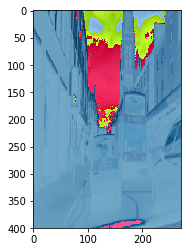

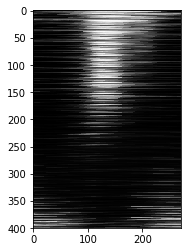

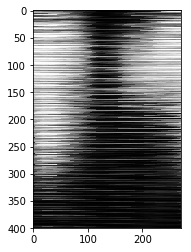

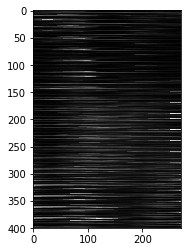

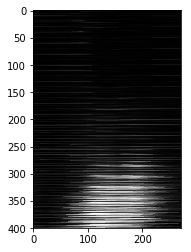

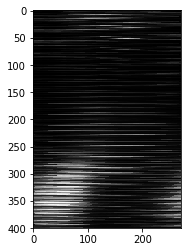

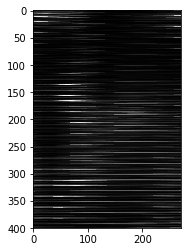

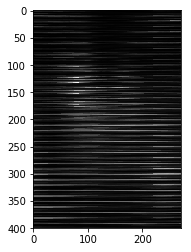

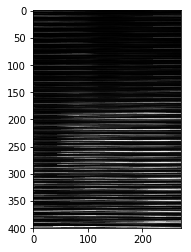

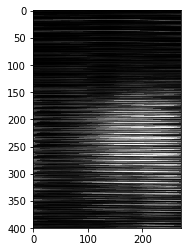

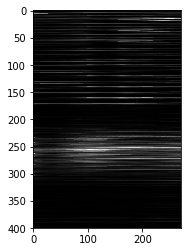

In [30]:
import matplotlib.pyplot as plt


test_img=np.expand_dims(G[0][0,...],axis=0)
print (test_img.shape)
predict_test=m.predict(test_img)
print (predict_test.shape)
predict_test=np.reshape(predict_test,(1,400,272,10))

plt.imshow(G[0][0,...])
plt.show()
for i in range (10):
    plt.imshow(predict_test[0,:,:,i],cmap=plt.cm.gray)
    plt.show()

In [ ]:
input :(400, 272, 3)
label: (108800, 10)

(30, 30, 3)
[1 1 1]
(360, 480, 3)
(360, 480, 3)


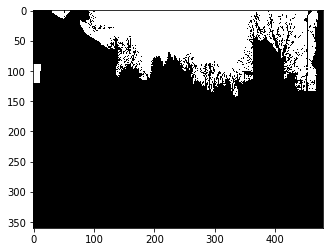

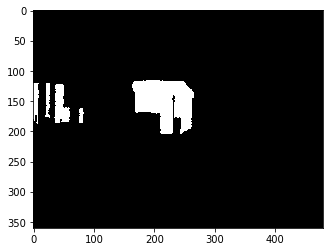

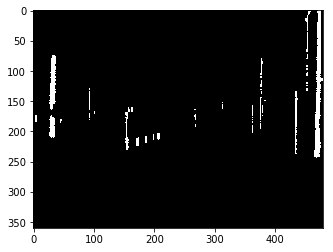

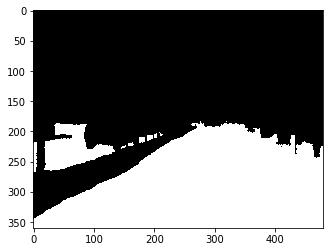

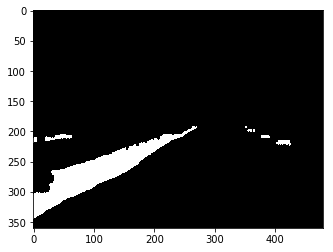

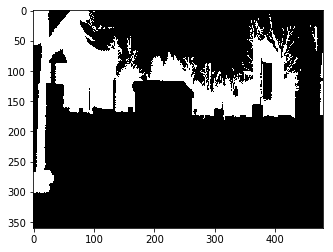

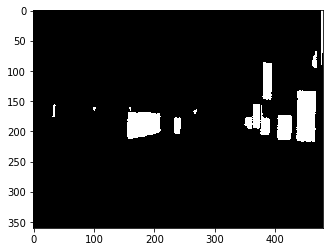

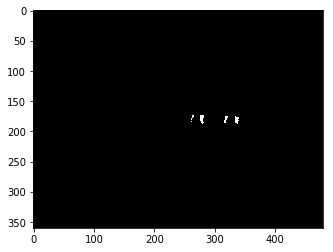

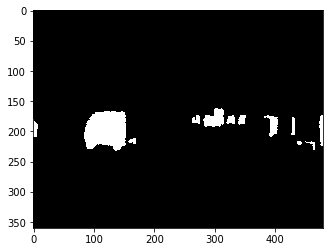

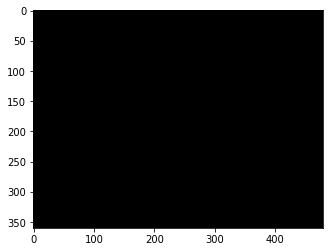

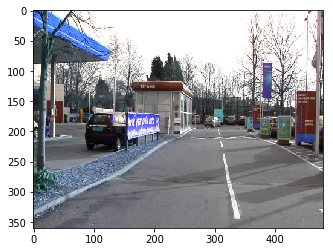

(172800, 10)


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

ann_img = np.zeros((30,30,3)).astype('uint8')


print (ann_img.shape)
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1

print (ann_img[ 3 , 4 ])

# plt.imshow('../dataset1/annotations_prepped_train/0001TP_006690.png')


anno_img=cv2.imread(glob('../dataset1/annotations_prepped_train/*.png')[0],1)
train_img=cv2.imread(glob('../dataset1/images_prepped_train/*.png')[0])
print (train_img.shape)

print (anno_img.shape)
anno_img=anno_img[:,:,0]
seg_labels = np.zeros((  360 , 480  , 10 ))


for c in range(10):
    seg_labels[: , : , c ] = (anno_img == c ).astype(int)
    plt.imshow(seg_labels[: , : , c ],cmap=plt.cm.gray)
    plt.show()

plt.imshow(train_img)
plt.show()


seg_labels = np.reshape(seg_labels, ( 360*480 , 10 ))

print (seg_labels.shape)
# cv2.imwrite( "ann_1.png" ,ann_img )

In [52]:
from keras.models import Sequential
from keras.layers import Reshape
from keras.models import Model
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Reshape, core, Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Convolution3D, MaxPooling3D, ZeroPadding3D , ZeroPadding3D , UpSampling3D
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.recurrent import LSTM
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam , SGD
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from keras import backend as K





def Unet (nClasses , optimizer=None , input_width=360 , input_height=480 , nChannels=1 ): 
    
#     inputs = Input((nChannels, input_height, input_width))
    inputs = Input((input_height, input_width, nChannels))

    
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(inputs)
    conv1 = Dropout(0.2)(conv1)
    conv1 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Dropout(0.2)(conv2)
    conv2 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Dropout(0.2)(conv3)
    conv3 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv3)

    up1 = merge([UpSampling2D(size=(2, 2))(conv3), conv2], mode='concat', concat_axis=-1)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up1)
    conv4 = Dropout(0.2)(conv4)
    conv4 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv4)
    
    up2 = merge([UpSampling2D(size=(2, 2))(conv4), conv1], mode='concat', concat_axis=-1)
    conv5 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up2)
    conv5 = Dropout(0.2)(conv5)
    conv5 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv5)
    
    conv6 = Convolution2D(nClasses, 1, 1, activation='relu',border_mode='same')(conv5)
    conv6 = core.Reshape((nClasses,input_height*input_width))(conv6)
    conv6 = core.Permute((2,1))(conv6)


    conv7 = core.Activation('softmax')(conv6)

    model = Model(input=inputs, output=conv7)

    if not optimizer is None:
	    model.compile(loss="categorical_crossentropy", optimizer= optimizer , metrics=['accuracy'] )
	
    return model

model = Unet(10,)
model.summary()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu")`
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` 

(?, 10, 172800)
(?, 172800, 10)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 480, 360, 1)  0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 480, 360, 32) 320         input_5[0][0]                    
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 480, 360, 32) 0           conv2d_37[0][0]                  
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 480, 360, 32) 9248        dropout_18[0][0]                 
_____________________________________________________________________________